In [373]:
import chainer
import numpy as np

In [374]:
chainer.__version__

'4.0.0'

In [375]:
L = chainer.links

In [376]:
# weight
np.random.seed(0)

fc = L.Linear(3, 2)
fc.W

variable W([[ 1.0184761 ,  0.23103087,  0.5650746 ],
            [ 1.2937803 ,  1.0782351 , -0.56423163]])

In [377]:
# bias
fc.b

variable b([0., 0.])

In [378]:
np.random.seed(3)
fc.W, fc.b

(variable W([[ 1.0184761 ,  0.23103087,  0.5650746 ],
             [ 1.2937803 ,  1.0782351 , -0.56423163]]), variable b([0., 0.]))

In [379]:
x = np.array([[1, 2, 3]], dtype=np.float32)
u = fc(x)

In [380]:
u

variable([[3.1757617, 1.7575557]])

In [381]:
x = np.array([[1, 2, 3]], 'f')
fc(x)

variable([[3.1757617, 1.7575557]])

In [382]:
F = chainer.functions

In [383]:
z = F.relu(u)
z

variable([[3.1757617, 1.7575557]])

In [384]:
F.relu(np.array([-1, 0, 1, 3], 'f'))

variable([0., 0., 1., 3.])

実践問題

In [385]:
np.random.seed(3)

In [386]:
# Link
x = np.array([[1, 2, 3]], 'f')

fc1 = L.Linear(3, 2)
fc2 = L.Linear(2, 1)
u1 = fc1(x)
z1 = F.relu(u1)
y = fc2(z1)

In [387]:
u1, z1, y

(variable([[ 1.7038419, -2.010649 ]]),
 variable([[1.7038419, 0.       ]]),
 variable([[-0.09968679]]))

In [388]:
x.shape, u1.shape, z1.shape, y.shape

((1, 3), (1, 2), (1, 2), (1, 1))

In [389]:
# loss
t = np.array([[3]], 'f')

In [390]:
loss = F.mean_absolute_error(t, y)
loss

variable(3.0996869)

In [391]:
F.mean_squared_error(t, y), F.mean_absolute_error(t, y)

(variable(9.608059), variable(3.0996869))

## Classification example

In [392]:
import pandas as pd

In [393]:
df = pd.read_csv('../data/wine_class.csv')

In [394]:
df.head()

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,1,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,1,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735


In [395]:
t = df['Class']
x = df.drop(['Class'], axis=1)

In [396]:
x.shape, t.shape

((178, 10), (178,))

In [397]:
x.head()

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735


In [398]:
t.shape

(178,)

In [399]:
type(x), type(t)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [400]:
type(x.values), type(t.values)

(numpy.ndarray, numpy.ndarray)

In [401]:
t.min(), t.max()

(1, 3)

In [402]:
t = t.values - 1
x = x.values

In [403]:
t.min(), t.max()

(0, 2)

In [404]:
x.dtype, t.dtype

(dtype('float64'), dtype('int64'))

In [405]:
x.shape, t.shape

((178, 10), (178,))

In [406]:
x = x.astype('float32')
t = t.astype('int32')

In [407]:
x.dtype, t.dtype

(dtype('float32'), dtype('int32'))

In [408]:
# データセットの形式にする
dataset = list(zip(x, t))

In [409]:
type(dataset), type(dataset[0]), type(dataset[0][0]), type(dataset[0][1])

(list, tuple, numpy.ndarray, numpy.int32)

In [410]:
# Split Dataset
n_train = int(len(dataset)*0.7)

train, test = chainer.datasets.split_dataset_random(dataset,
                                                    n_train,
                                                   seed=0)

In [411]:
len(train), len(test), type(train[0]), type(train[0][0])

(124, 54, tuple, numpy.ndarray)

In [412]:
train[0][0].shape[0]

10

In [413]:
# define model
input_shape = train[0][0].shape[0]

class NN(chainer.Chain):
    def __init__(self, n_mid_units=5, n_out=3):
        super().__init__()
        with self.init_scope():
            self.fc1 = L.Linear(input_shape, n_mid_units)
            self.fc2 = L.Linear(n_mid_units, n_out)
            
    # forward
    def __call__(self, x):
        h = self.fc1(x)
        h = F.relu(h)
        h = self.fc2(h)
        return h

In [414]:
np.random.seed(1)

# Classification model wrapper
nn = NN(10, 3)
model = L.Classifier(nn)

# Define Optimazer
optimizer = chainer.optimizers.SGD()
optimizer.setup(model)

In [415]:
# Select batchsize
batchsize = 10
train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter  = chainer.iterators.SerialIterator(test,  batchsize, repeat=False, shuffle=False)

In [416]:
len(train_iter.next())

10

In [417]:
# Configure device
updater = chainer.training.StandardUpdater(train_iter, 
                                           optimizer, 
                                           device=-1)

In [418]:
from chainer.training import extensions

In [419]:
# Select epoch number
epoch = 50

# trainer
trainer = chainer.training.Trainer(updater,
                                  (epochs, 'epoch'),
                                  out='result/wine')

# Evaluate test data
trainer.extend(extensions.Evaluator(test_iter, 
                                    model, 
                                    device=-1))

# Learning log
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

# Print learnign log
trainer.extend(extensions.PrintReport(['epoch', 
                                       'main/accuracy', 
                                       'validation/main/accuracy', 
                                       'main/loss', 
                                       'validation/main/loss', 
                                       'elapsed_time']),
               trigger=(1, 'epoch'))

In [420]:
trainer.run()

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.416667       0.366667                  415.717     1.09772               0.0225879     
2           0.408333       0.366667                  1.09592     1.09733               0.0468021     
3           0.423077       0.366667                  1.09386     1.09694               0.0731914     
4           0.433333       0.366667                  1.09209     1.09662               0.0960456     
5           0.408333       0.366667                  1.0925      1.09644               0.120135      
6           0.415385       0.366667                  1.09136     1.09626               0.147537      
7           0.425          0.366667                  1.08817     1.09613               0.171185      
8           0.438462       0.366667                  1.08659     1.09603               0.195746      
9           0.4            0.366667                  1.08981     1.09601            

In [421]:
!pwd

/handson/myanalysis


結果の可視化

In [422]:
import json
%matplotlib inline

In [423]:
with open('../result/wine/log') as f:
    result = pd.DataFrame(json.load(f))

In [424]:
result

,elapsed_time,epoch,iteration,main/accuracy,main/loss,validation/main/accuracy,validation/main/loss
0,0.032401,1,13,0.415385,1.103918,0.341667,1.214419
1,0.063564,2,25,0.575000,1.003100,0.475000,0.993539
2,0.096493,3,38,0.553846,0.942188,0.608333,0.922005
3,0.126369,4,50,0.641667,0.848846,0.625000,0.856451
4,0.159143,5,62,0.650000,0.812970,0.625000,0.805480
5,0.190904,6,75,0.684615,0.748720,0.608333,0.771339
6,0.220960,7,87,0.675000,0.719701,0.625000,0.728936
7,0.255656,8,100,0.753846,0.704584,0.625000,0.702140
8,0.288155,9,112,0.716667,0.688909,0.641667,0.673809
9,0.320836,10,124,0.800000,0.594708,0.683333,0.656860


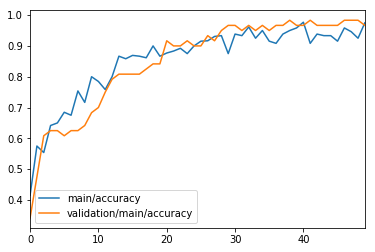

In [425]:
result[['main/accuracy', 'validation/main/accuracy']].plot()

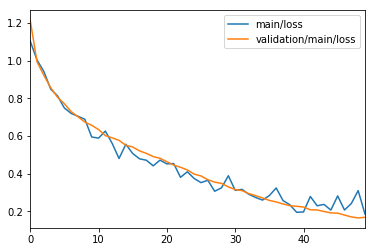

In [426]:
result[['main/loss', 'validation/main/loss']].plot()

モデルの改良

In [427]:
class NN(chainer.Chain):
    def __init__(self, n_hidden=5, n_out=3):
        super().__init__()
        
        with self.init_scope():
            self.f1 = L.Linear(None, n_hidden)
            self.f2 = L.Linear(None, n_hidden)
            self.f3 = L.Linear(None, n_out)
            self.bn = L.BatchNormalization(10)
            
    def __call__(self, x):
        h = self.bn(x)
        h = self.f1(h)
        h = F.relu(h)
        h = self.f2(h)
        h = F.relu(h)
        h = self.f3(h)
        return h

In [428]:
# Fix seed / hyperparameter
np.random.seed(0)
batchsize = 10
epoch = 500
device = -1

# define model
nn = NN(n_hidden=5)
model = L.Classifier(nn)

# Setting Learning
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

train_iter = chainer.iterators.SerialIterator(train, batchsize)
test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                            repeat=False,
                                            shuffle=False)

updater = chainer.training.StandardUpdater(train_iter, 
                                           optimizer,
                                          device=device)

trainer = chainer.training.Trainer(updater,
                                   (epoch, 'epoch'),
                                   out='result/wine/mylog')
trainer.extend(extensions.Evaluator(test_iter, model, device=device))
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

trainer.run()

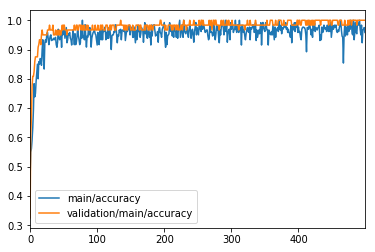

In [429]:
with open('result/wine/mylog/log') as f:
    result = pd.DataFrame(json.load(f))

result[['main/accuracy', 'validation/main/accuracy']].plot()

In [430]:
trainer.observation['main/loss']

variable(0.00902712)

実験

In [431]:
def model_experience(chainer_model, setting):
    # Fix seed / hyperparameter
    np.random.seed(0)
    batchsize = setting['batch_size']
    epoch = setting['epochs']
    if setting['device'] == 'CPU':
        device = -1
    elif setting['device'] == 'GPU':
        device = 0

    # define model
    model = L.Classifier(chainer_model)

    # Setting Learning
    optimizer = chainer.optimizers.Adam()
    optimizer.setup(model)

    train_iter = chainer.iterators.SerialIterator(train, batchsize)
    test_iter = chainer.iterators.SerialIterator(test, batchsize,
                                                repeat=False,
                                                shuffle=False)

    updater = chainer.training.StandardUpdater(train_iter, 
                                               optimizer,
                                              device=device)

    trainer = chainer.training.Trainer(updater,
                                       (epoch, 'epoch'),
                                       out='result/wine/mylog')
    trainer.extend(extensions.Evaluator(test_iter, model, device=device))
    trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))

    trainer.run()
    
    print('Learning elapsed time:', trainer.elapsed_time)
    print('Validation accuracy:', trainer.observation['validation/main/accuracy'])
    
    with open('result/wine/mylog/log') as f:
        result = pd.DataFrame(json.load(f))

    result[['main/accuracy', 'validation/main/accuracy']].plot()
    
    return model

In [432]:
class NN(chainer.Chain):
    def __init__(self, n_hidden=5, n_out=3):
        super().__init__()
        
        with self.init_scope():
            self.f1 = L.Linear(None, n_hidden)
            self.f2 = L.Linear(None, n_hidden)
            self.f3 = L.Linear(None, n_out)
            self.bn = L.BatchNormalization(10)
            self.bn_l = L.BatchNormalization(n_hidden)
            
    def __call__(self, x):
        h = self.bn(x)
        h = self.f1(h)
        h = F.relu(h)
        h = self.bn_l(h)
        h = self.f2(h)
        h = F.relu(h)
        h = self.f3(h)
        return h

Learning elapsed time: 2.2770516389991826
Validation accuracy: 0.9666666587193807


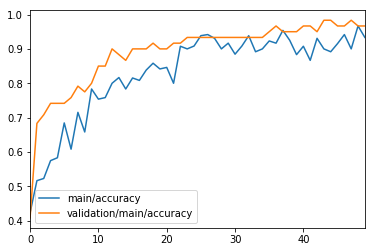

In [433]:
chainer_model = NN()
setting = {
    'batch_size': 10,
    'epochs': 50,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 4.155472289001409
Validation accuracy: 0.98333335


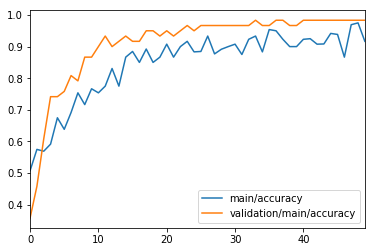

In [434]:
chainer_model = NN()
setting = {
    'batch_size': 10,
    'epochs': 50,
    'device': 'GPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 2.284462486999473
Validation accuracy: 0.9833333293596903


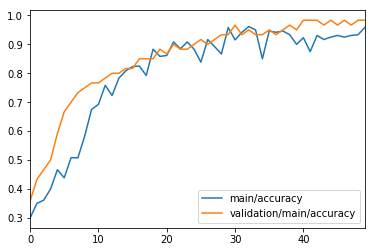

In [435]:
chainer_model = NN(10)
setting = {
    'batch_size': 10,
    'epochs': 50,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 2.29383314199913
Validation accuracy: 0.9833333293596903


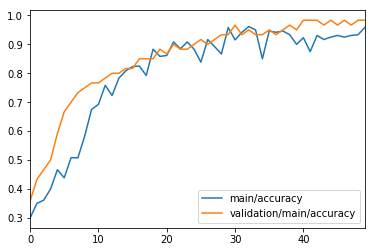

In [450]:
chainer_model = NN(10)
setting = {
    'batch_size': 10,
    'epochs': 50,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 0.17882841600112442
Validation accuracy: 0.5


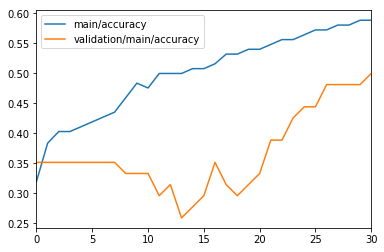

In [452]:
chainer_model = NN()
setting = {
    'batch_size': 200,
    'epochs': 50,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 0.3959932600009779
Validation accuracy: 0.8703703880310059


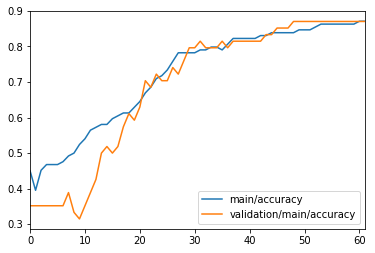

In [453]:
chainer_model = NN(10)
setting = {
    'batch_size': 200,
    'epochs': 100,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

Learning elapsed time: 2.333978938000655
Validation accuracy: 1.0


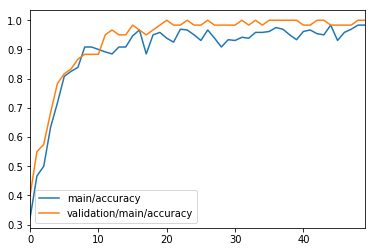

In [436]:
chainer_model = NN(20)
setting = {
    'batch_size': 10,
    'epochs': 50,
    'device': 'CPU'
}

model = model_experience(chainer_model, setting)

* バッチサイズを小さくすると実行速度が遅くなる
* バッチサイズが大きいと、学習が遅くなる
* どちらもバランスが大事そうな印象

モデルの保存・読み込み

In [437]:
# save model
chainer.serializers.save_npz('./models/wine.npz', model)

In [438]:
# load model
# モデルの構造は同じでないといけない
model = L.Classifier(NN(20))

chainer.serializers.load_npz('models/wine.npz', model)

予測値の計算

In [439]:
x_new = x[0]
x_new

array([1.423e+01, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00, 3.060e+00,
       2.800e-01, 5.640e+00, 1.040e+00, 1.065e+03], dtype=float32)

In [440]:
y = model.predictor(x_new[np.newaxis])

/usr/local/lib/python3.5/dist-packages/chainer/functions/normalization/batch_normalization.py:67: UserWarning: A batch with no more than one sample has been given to F.batch_normalization. F.batch_normalization will always output a zero tensor for such batches. This could be caused by incorrect configuration in your code (such as running evaluation while chainer.config.train=True), but could also happen in the last batch of training if non-repeating iterator is used.
  UserWarning)


In [441]:
probability = F.softmax(y)
probability

variable([[0.38403735, 0.44642043, 0.16954227]])

In [442]:
np.argmax(probability.array)

1

In [443]:
t[0]

0